## Import relevant packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets, transforms

## Download and load MNIST dataset

In [2]:
mnist_train = datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
sample_image, label = mnist_train[0]

## Define CoordConv2D Layer

In [3]:
class CoordConv2DLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, input_tensor):
        _, height, width = input_tensor.size()

        # Create x and y coordinate grids
        xx_channel = torch.arange(width).view(1, 1, 1, width).expand(1, 1, height, width).float() / (width - 1)
        yy_channel = torch.arange(height).view(1, 1, height, 1).expand(1, 1, height, width).float() / (height - 1)

        # Concatenate the coordinate channels to the input tensor
        output_tensor = torch.cat([xx_channel, yy_channel], dim=1)
        return output_tensor

## Apply CoordConv2D Layer to the sample MNIST digit input

In [4]:
coordinate_layer = CoordConv2DLayer()
coordinate_layer_output = coordinate_layer(sample_image)

## Check shape of CoordConv2D Layer output 

In [5]:
coordinate_layer_output.shape

torch.Size([1, 2, 28, 28])

## Visualize CoordConv2D Layer output

In [6]:
coordinate_layer_output_plot = coordinate_layer_output.numpy()

Text(0.5, 1.0, 'Y channel')

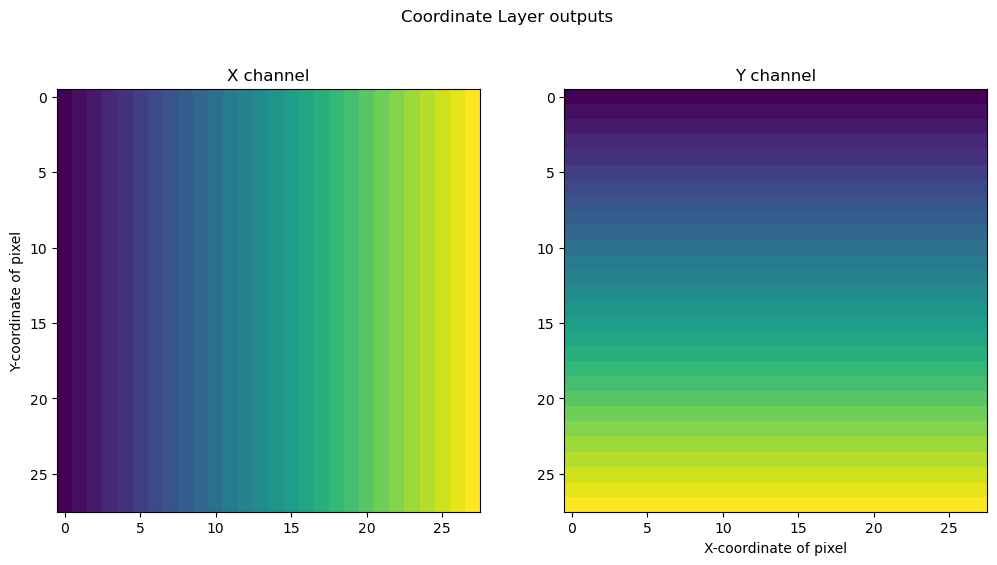

In [7]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Coordinate Layer outputs")

ax_1.imshow(coordinate_layer_output_plot[0, 0], cmap='viridis')
ax_1.set_ylabel('Y-coordinate of pixel')
ax_1.set_title('X channel')

ax_2.imshow(coordinate_layer_output_plot[0, 1], cmap='viridis')
ax_2.set_xlabel('X-coordinate of pixel')
ax_2.set_title('Y channel')

## Define FourierConv2D Layer

In [8]:
class FourierConv2DLayer(nn.Module):
    def __init__(self, L):
        super().__init__()
        self.L = L

    def forward(self, x):
        _, num_input_channels, height, width = x.size()

        # Generate frequencies
        base_frequency = 2
        exponent_value = torch.arange(L)
        frequencies = torch.pow(torch.tensor(base_frequency), exponent_value).float()

        # Apply Fourier basis functions
        fourier_features = [torch.sin(frequencies[j] * torch.pi * x) for j in range(L)]
        fourier_features += [torch.cos(frequencies[j] * torch.pi * x) for j in range(L)]

        # Concatenate the Fourier features along the channel dimension
        fourier_features = torch.cat(fourier_features, dim=1)

        return fourier_features

## Apply FourierConv2D Layer

In [9]:
L = 4
fourier_layer = FourierConv2DLayer(L)

In [10]:
fourier_layer_output = fourier_layer(coordinate_layer_output)

## Check shape of Fourier Layer

In [11]:
fourier_layer_output.shape

torch.Size([1, 16, 28, 28])

## Visualize Fourier Layer output

In [12]:
fourier_layer_output_plot = fourier_layer_output.numpy()

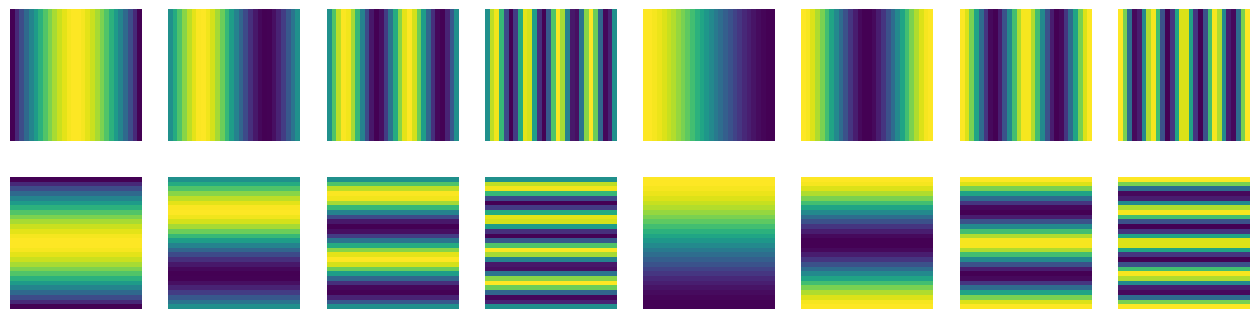

In [13]:
fig, axes = plt.subplots(2, 8, figsize=(16, 4))

for i in range(16):
    row_index = i % 2
    ax = axes[row_index, i // 2]
    ax.imshow(fourier_layer_output_plot[0, i], cmap='viridis')
    ax.axis('off')

plt.show()

## Future work

1. We discussed earlier that for the CoordConv2D Layer, we would like the ability to "switch ON and OFF" the layer. For the exact same reasons, we would also like to build in this effect for the FourierConv2DLayer
2. Add comments and explanations in this document